<a href="https://colab.research.google.com/github/eundongg/AI_Practice/blob/main/KNN%2CK_means%2CMean-Shift_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

knn 알고리즘을 활용하여 load_breast_cancer데이터를 실습하고
kmeans와 기타 cluster알고리즘을 활용하여 make_moons데이터의 accuracy를 비교하시오

# 1. KNN 알고리즘

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1004)
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)

In [ ]:
print(scores)

0.9035087719298246




---



# K-means 알고리즘(비지도학습)

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X,y = make_moons(n_samples=1000, noise=.05, random_state=1004)

In [ ]:
moons = make_moons()
print(moons)

(array([[ 7.15472413e-01, -4.58667853e-01],
       [ 1.03205158e+00, -4.99486216e-01],
       [-9.26916757e-01,  3.75267005e-01],
       [-3.45365054e-01,  9.38468422e-01],
       [-4.62538290e-01,  8.86599306e-01],
       [ 9.67294863e-01,  2.53654584e-01],
       [ 4.27883340e-01, -3.20172255e-01],
       [-6.72300890e-01,  7.40277997e-01],
       [ 3.27051370e-02,  2.46345416e-01],
       [-9.00968868e-01,  4.33883739e-01],
       [ 1.09602303e+00, -4.95379113e-01],
       [ 8.20998618e-03,  3.72122838e-01],
       [ 2.84527587e-01,  9.58667853e-01],
       [ 2.22520934e-01,  9.74927912e-01],
       [ 5.37461710e-01, -3.86599306e-01],
       [-8.71318704e-01,  4.90717552e-01],
       [ 4.04783343e-01,  9.14412623e-01],
       [ 6.72300890e-01,  7.40277997e-01],
       [-8.01413622e-01,  5.98110530e-01],
       [ 2.38554042e-01, -1.48228395e-01],
       [ 9.81559157e-01,  1.91158629e-01],
       [ 5.18392568e-01,  8.55142763e-01],
       [ 1.40478334e+00, -4.14412623e-01],
       [ 1

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[ 1.202629   -0.06820732]
 [-0.19998802  0.5678902 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

#predict
print(kmeans.labels_)

[1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0
 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 1 

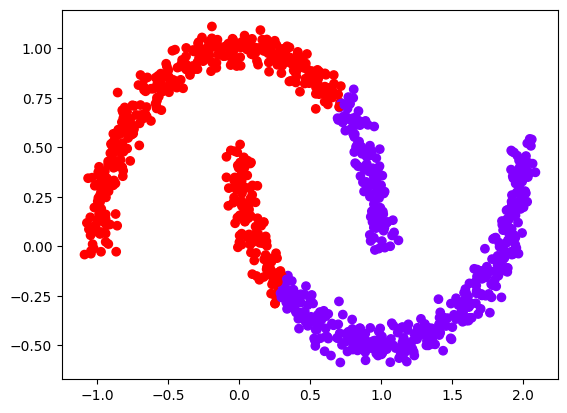

In [ ]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score

km_label = kmeans.labels_
km_silhouette = silhouette_score(X,km_label)
print(km_silhouette)

0.4881123808609988


# 3. Mean-Shift Clustering 알고리즘

In [ ]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth = 0.5)
ms.fit(X)

MeanShift(bandwidth=0.5)

In [ ]:
print(ms.cluster_centers_)

[[ 0.98161177 -0.40247935]
 [ 0.19927856  0.93021822]
 [ 0.64876748  0.70066824]
 [ 1.75891096 -0.07649051]
 [ 0.27101105 -0.1210033 ]
 [-0.62179911  0.71420839]]


In [ ]:
#predict
print(ms.labels_)

[1 1 0 1 2 2 0 4 3 0 2 2 5 0 0 5 2 1 4 0 1 5 4 0 5 5 4 5 0 3 0 4 3 4 4 5 2
 2 0 2 0 4 2 5 3 2 0 5 4 5 2 1 1 3 4 5 3 1 5 4 0 0 2 4 3 5 0 1 5 0 3 3 0 2
 5 0 1 4 0 5 4 5 1 3 3 2 3 0 3 3 4 5 1 4 1 0 0 0 0 2 2 1 0 0 0 5 5 4 1 1 3
 0 2 5 0 2 0 0 4 3 2 2 5 3 5 1 0 5 5 2 1 4 1 3 3 3 5 5 4 5 4 2 5 0 4 5 5 4
 2 1 2 2 4 5 3 0 0 5 5 1 0 3 4 4 0 1 3 1 1 5 0 4 5 4 4 5 3 5 4 0 3 2 5 5 5
 4 5 5 0 0 3 0 5 0 4 3 4 3 5 0 3 3 2 1 1 5 4 2 0 2 4 4 5 0 1 2 5 3 4 0 1 3
 5 5 1 3 4 3 0 4 1 5 2 5 5 3 2 5 0 2 2 5 5 4 4 4 3 0 3 1 0 1 4 1 4 4 1 0 5
 5 1 0 5 5 3 2 5 4 0 1 0 2 1 5 3 4 1 2 4 5 0 3 3 0 0 5 1 3 1 3 0 3 4 5 0 4
 5 1 3 4 3 4 5 1 4 0 0 4 5 0 2 4 3 3 3 4 3 4 1 2 5 5 1 1 3 2 4 5 2 0 2 1 1
 5 2 4 1 3 4 2 4 3 3 0 2 5 3 5 3 1 4 4 4 5 3 4 4 5 3 4 3 5 2 4 0 5 5 0 0 3
 1 3 2 5 5 2 5 5 0 4 0 5 2 5 3 3 0 2 0 2 0 5 5 5 3 4 4 4 5 4 3 3 3 5 2 4 5
 5 1 2 4 2 1 0 1 3 1 3 5 3 5 0 2 5 5 3 4 3 2 2 5 5 2 1 4 3 0 3 4 2 0 5 0 0
 0 5 5 3 3 5 2 0 3 0 1 1 4 0 2 2 3 5 5 4 1 5 2 0 4 0 5 1 0 4 0 4 5 3 1 3 3
 4 4 5 3 1 1 3 4 3 0 4 5 

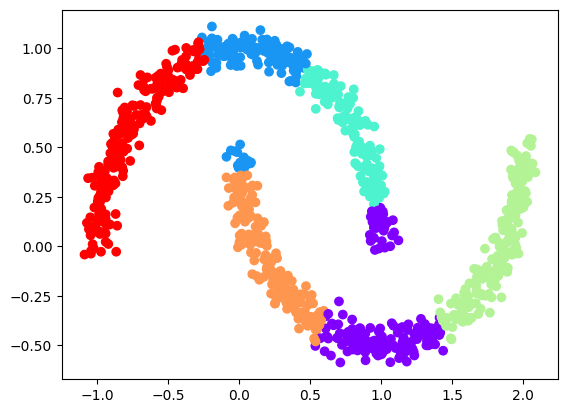

In [ ]:
plt.scatter(X[:,0],X[:,1],c=ms.labels_,cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score

ms_label = ms.labels_
ms_silhouette = silhouette_score(X,ms_label)
print(ms_silhouette)

0.4781877596373237
